## EDA of SEER Breast Cancer Dataset

The dataset includes the following independent features:

Numerical Attribute:

- Age: Age of patient at diagnosis
- Tumor Size: Size of tumor at diagnosis
- Regional Node Examined
- Reginol Node Positive
- Survival Months


Categorical Attribute:
- Race: Race of patient (white, other (American Indian/ AK Native, Asian/ Pacific Islander)
- Marital Status: Married (including common law), Single (never married), other)
- T Stage: Tumor Size (T2, T1, other)
- N Stage: Number of lymph nodes involved (N1, N2, other)
- 6th Stage: Overall stage of cancer (IIA, IIB, other)
- Grade: Grade of cancer (Moderately differentiated; Grade II, Poorly differentiated; Grade III, other)
- A Stage: Distant metastasis status (Regional, Distant)
- Estrogen Status
- Progesterone Status


Target Variable:
- Status: Alive or Dead


## Data Exploration

Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import math
import re
from scipy.sparse import csr_matrix
sns.set_style("darkgrid")
from ast import literal_eval
import matplotlib
#reconfigure default settings
sns.set_palette(sns.color_palette("hls", 8))
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Load the csv file
df = pd.read_csv("/Users/courtneydavid/Documents/Data Science/Breast Cancer/SEER Breast Cancer Dataset .csv")

In [4]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [5]:
df.tail()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


The dataset consists of 4024 entries, encompassing a combination of both numerical and categorical attributes. The "status" attribute can be employed as the target variable, enabling predictions on whether a patient is living or deceased.

In [6]:
df.shape

(4024, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [8]:
df.isna().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100

Age                         0.0
Race                        0.0
Marital Status              0.0
Unnamed: 3                100.0
T Stage                     0.0
N Stage                     0.0
6th Stage                   0.0
Grade                       0.0
A Stage                     0.0
Tumor Size                  0.0
Estrogen Status             0.0
Progesterone Status         0.0
Regional Node Examined      0.0
Reginol Node Positive       0.0
Survival Months             0.0
Status                      0.0
dtype: float64

In [10]:
column_names = df.columns
print(column_names)

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [11]:
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Age is unique: False
Race  is unique: False
Marital Status is unique: False
Unnamed: 3 is unique: False
T Stage  is unique: False
N Stage is unique: False
6th Stage is unique: False
Grade is unique: False
A Stage is unique: False
Tumor Size is unique: False
Estrogen Status is unique: False
Progesterone Status is unique: False
Regional Node Examined is unique: False
Reginol Node Positive is unique: False
Survival Months is unique: False
Status is unique: False


In [12]:
# Removing the Unnamed: 3 column because it is of no value. 
df.drop('Unnamed: 3', axis=1, inplace=True)
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In the attributes of age and survival months, the mean is less than the median, resulting in data that is skewed to the left, characterized by a negative skewness. Conversely, for the attributes of tumor size, regional nodes examined, and regional nodes positive, the mean surpasses the median, leading to data that is skewed to the right. This indicates a positively skewed distribution.

## Analysis of the Target Variable : 'Status'

In [14]:
df.Status.unique()

array(['Alive', 'Dead'], dtype=object)

The problem is classified as a classification task, as the target variable is discrete. Because the variable is categorical, we will inspect its frequency table, analyze the distribution in terms of percentages, and represent the data using a pie chart.

In [15]:
df.Status.value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

There are more alive patients than dead patients (imbalanced dataset).
3408 patients are alive, while 616 patients are dead.

In [16]:
df.Status.value_counts(normalize=True)

Alive    0.846918
Dead     0.153082
Name: Status, dtype: float64

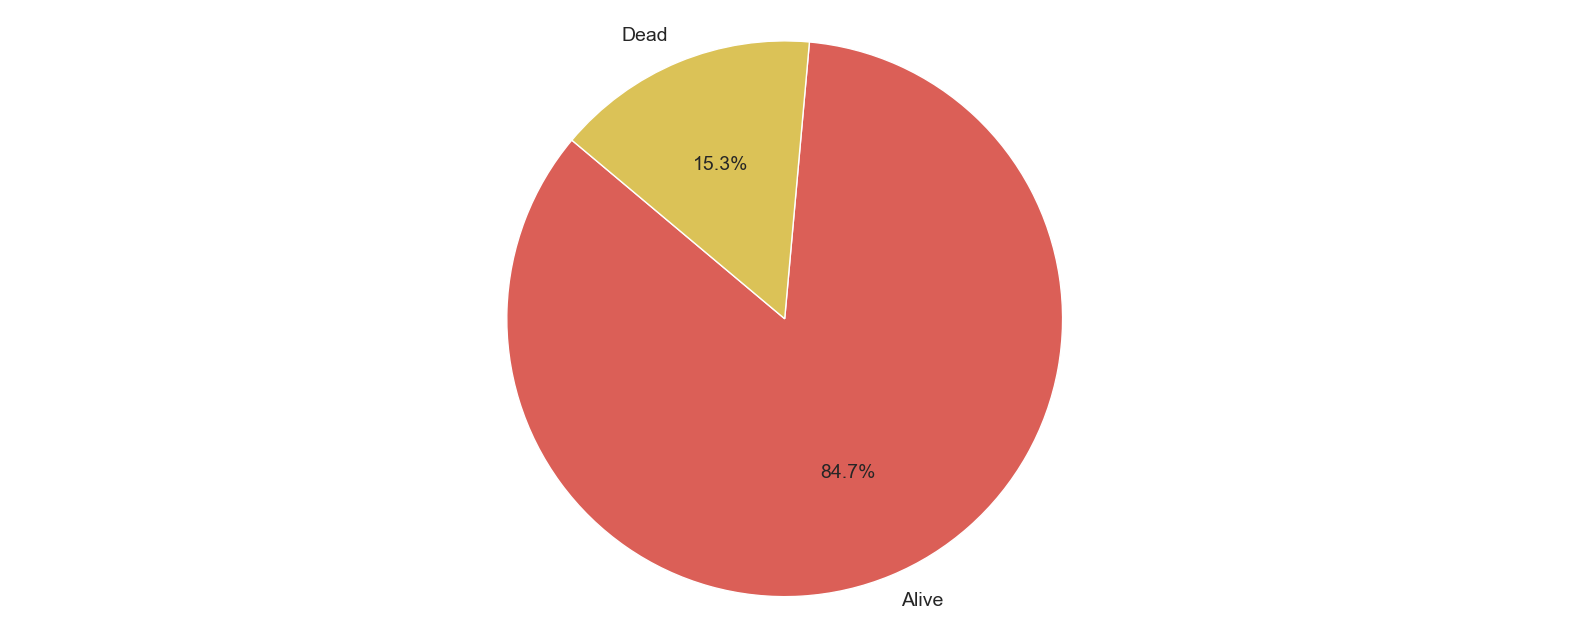

In [17]:
status_counts = df["Status"].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

## 2. Independent Attributes


## a) Age

In [18]:
df['Age'].describe()

count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64

The age range of the patients spans from 30 to 69 years. The 25th percentile of the patient age is 47, meaning 25% are younger than this age and 75% are older. The median age is 54, indicating that half of the patients are younger and half are older than this age. At the 75th percentile, the age is 61, with 75% of the patients being younger and 25% being older than this age.

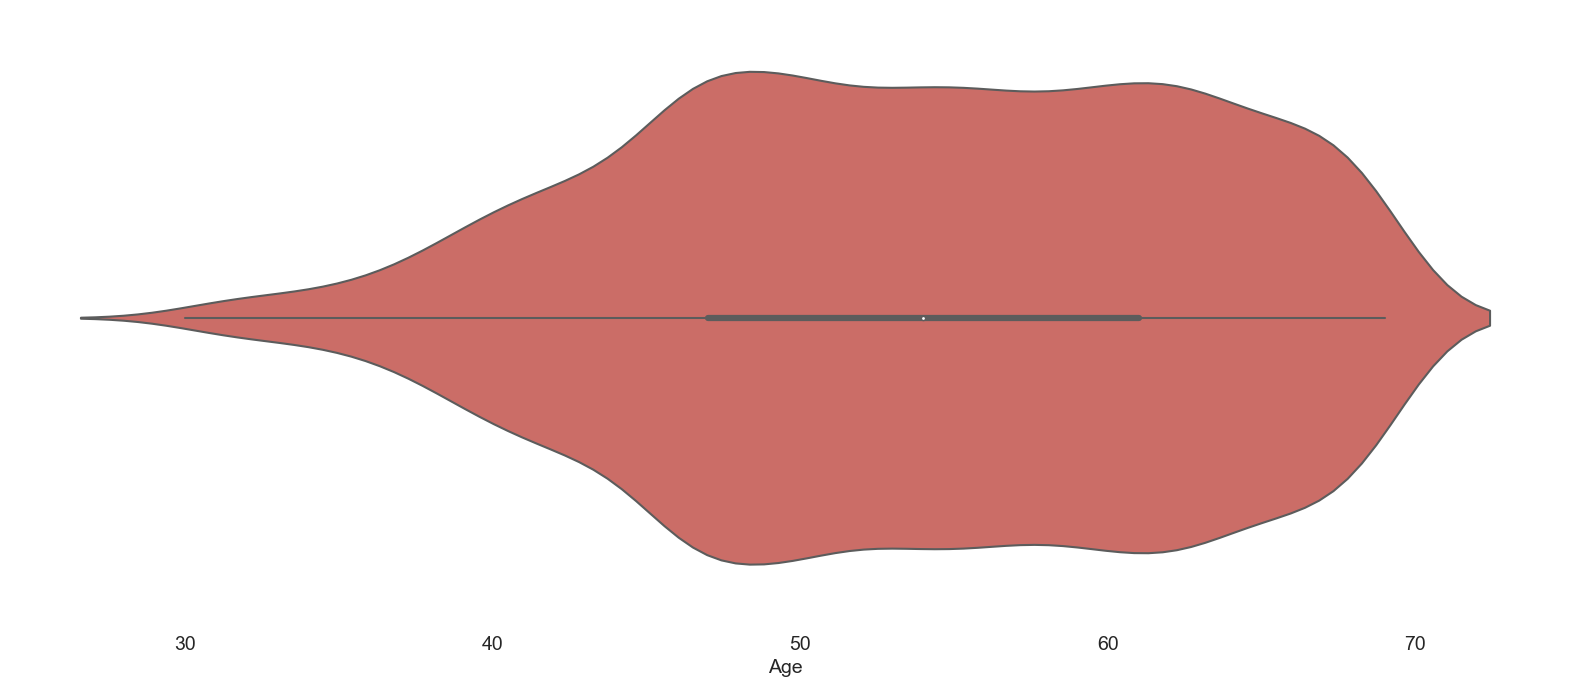

In [19]:
sns.violinplot(x=df['Age'])
plt.xlabel('Age')
plt.show()

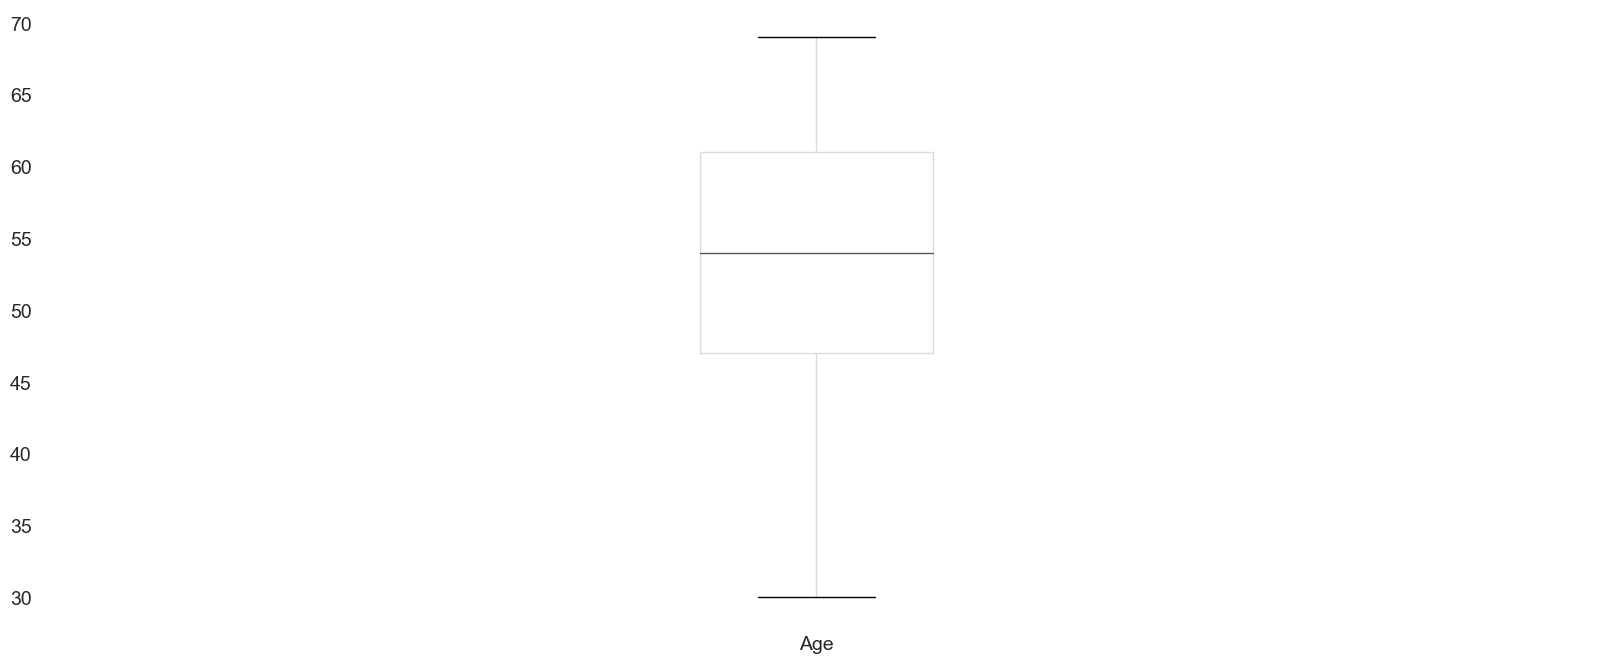

In [20]:
df.boxplot(column='Age')
plt.show()

There are no outliers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

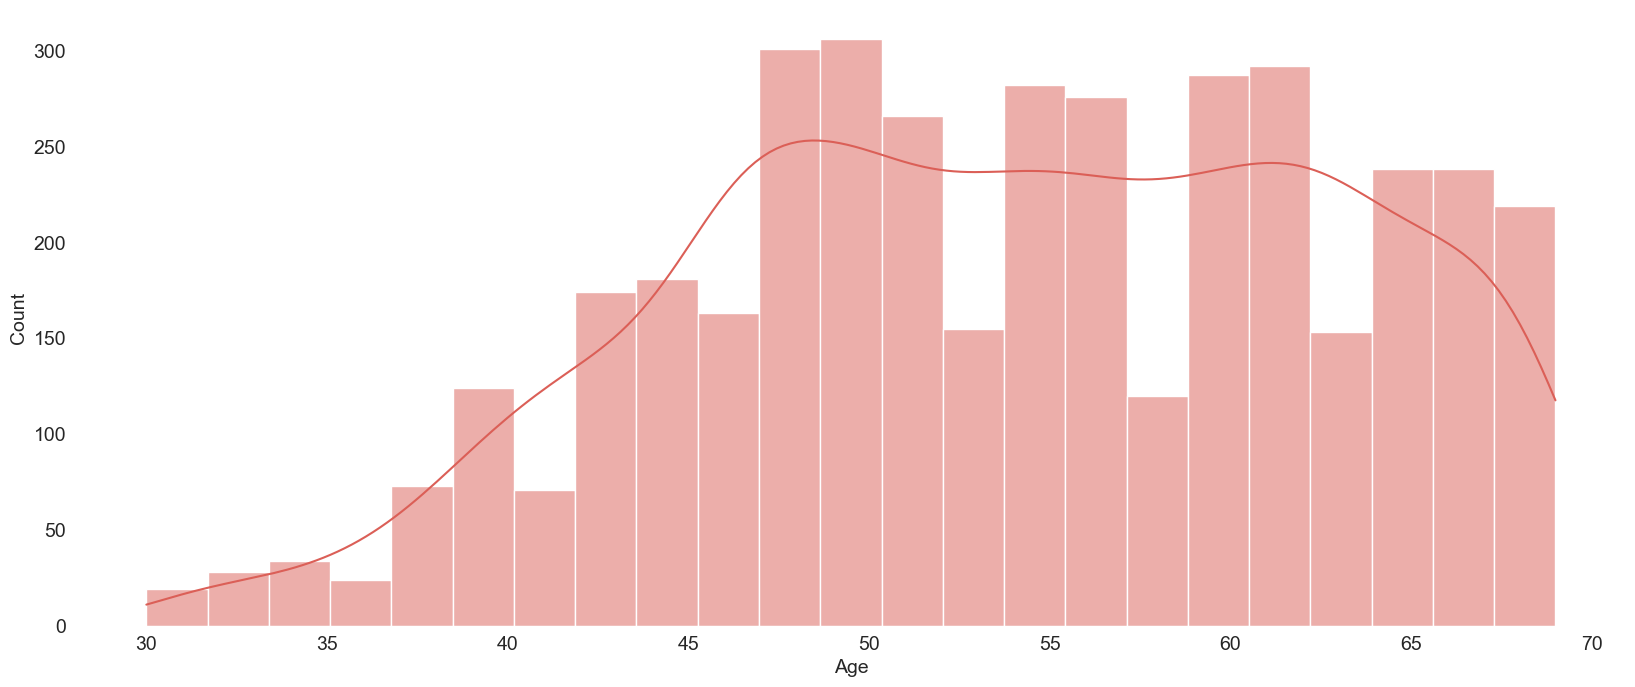

In [21]:
sns.histplot(df, x="Age", kde=True)

The distribution is negatively skewed (skewed to the left).

## b. Numerical Attribute Tumor Size

In [22]:
df['Tumor Size'].describe()

count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64

The tumor sizes range from 1 cm to 140 cm. At the 25th percentile, 25% of the tumors are smaller than 16 cm, and 75% are larger. The median size is 25 cm, meaning that half of the tumors are smaller and half are larger than this size. The 75th percentile is at 38 cm, with 75% of the tumors being smaller and 25% being larger than this size.

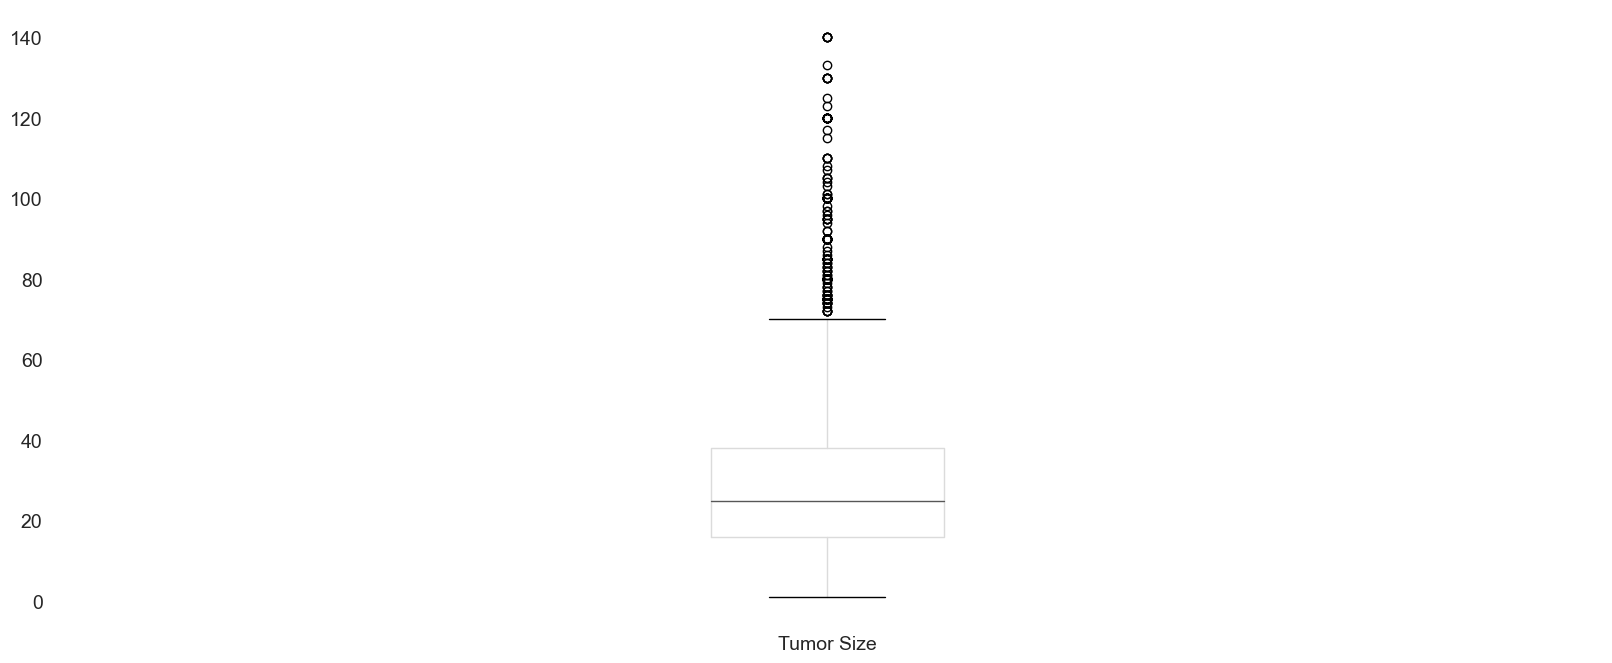

In [23]:
df.boxplot(column='Tumor Size')
plt.show()

There are a lot of outliers.

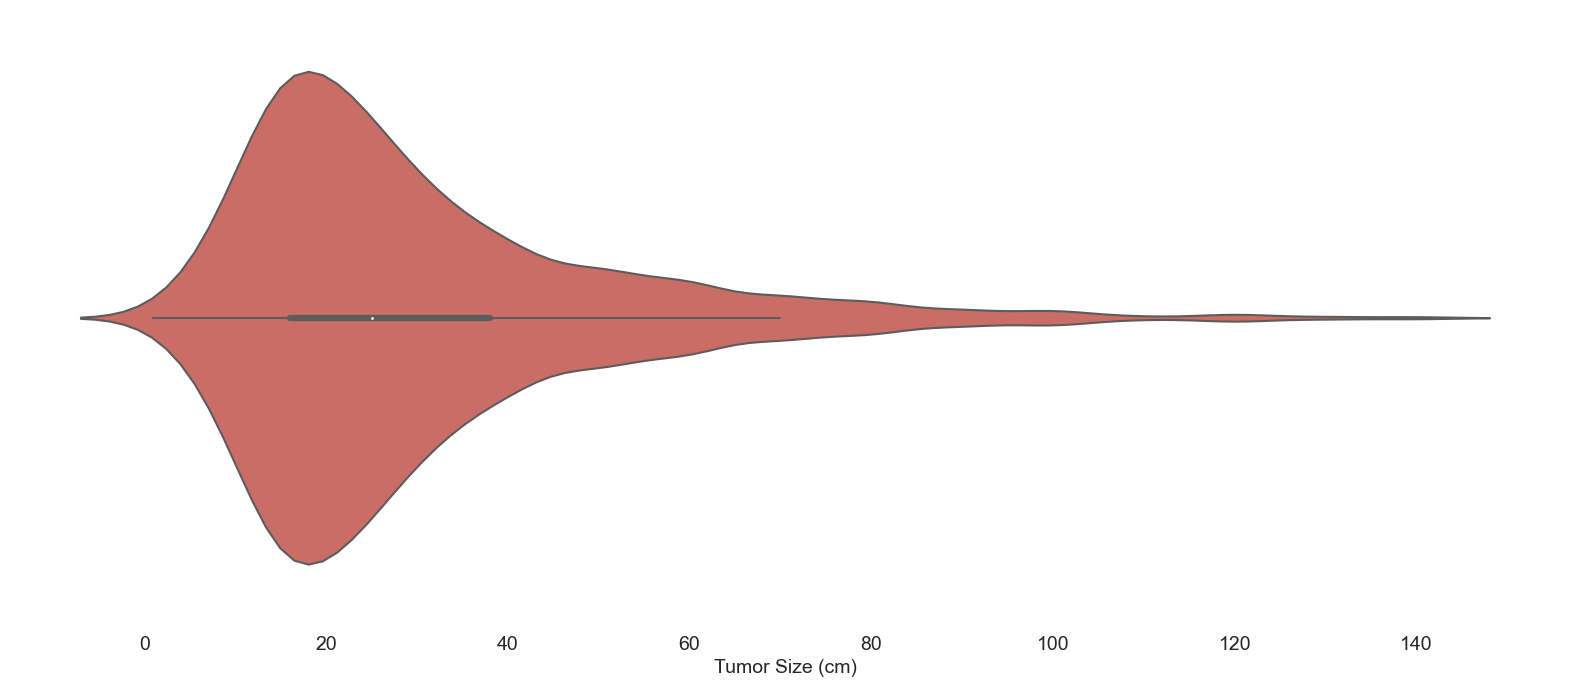

In [24]:
sns.violinplot(x=df["Tumor Size"])
plt.xlabel('Tumor Size (cm)')
plt.show()

As we can see the distribution is skewed to the right.

## c. Numerical Attribute Regional Node Examined

In [25]:
df['Regional Node Examined'].describe()

count    4024.000000
mean       14.357107
std         8.099675
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        61.000000
Name: Regional Node Examined, dtype: float64

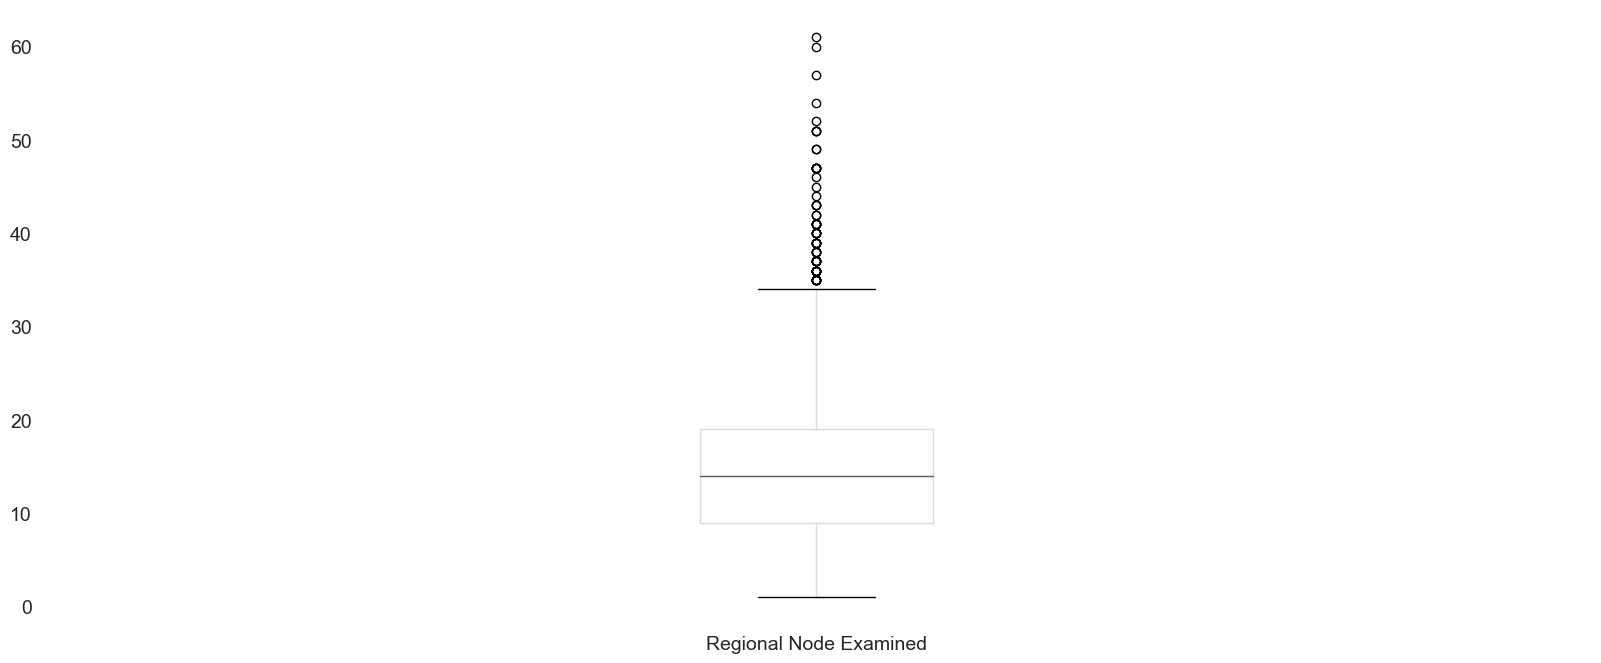

In [26]:
df.boxplot(column='Regional Node Examined')
plt.show()

<AxesSubplot:xlabel='Regional Node Examined', ylabel='Count'>

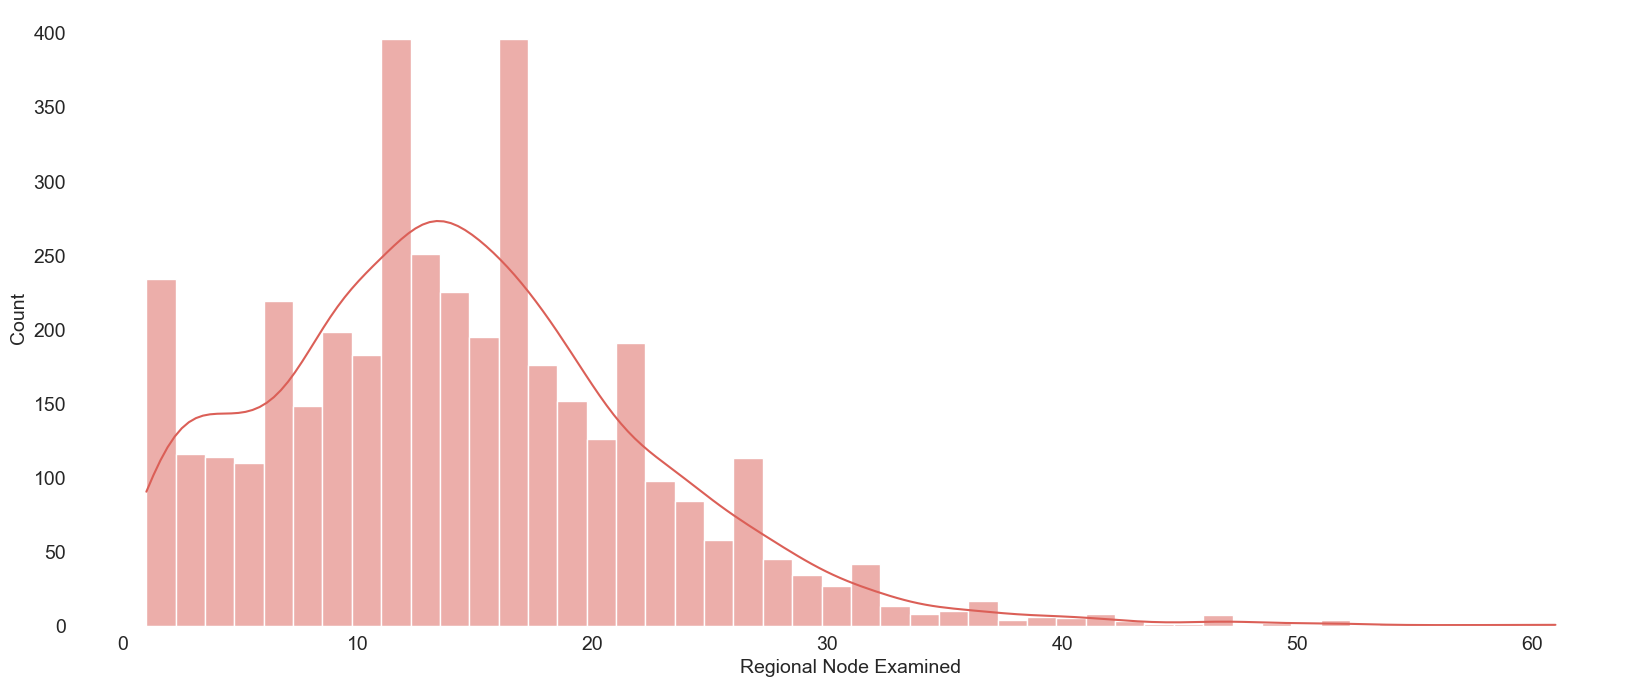

In [27]:
sns.histplot(df, x="Regional Node Examined", kde=True)

## d. Numerical Attribute Reginol Node Positive

In [28]:
df['Reginol Node Positive'].describe()

count    4024.000000
mean        4.158052
std         5.109331
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        46.000000
Name: Reginol Node Positive, dtype: float64

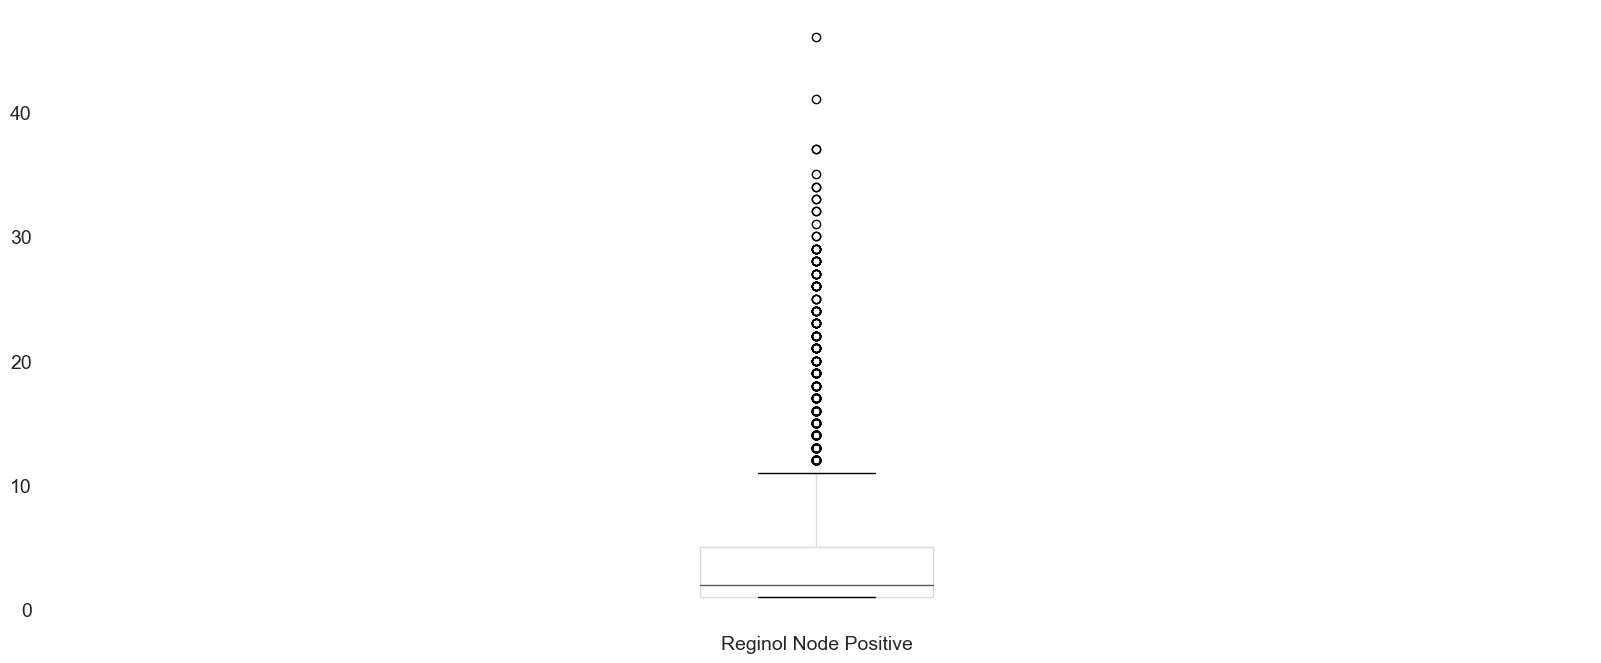

In [29]:
df.boxplot(column='Reginol Node Positive')
plt.show()

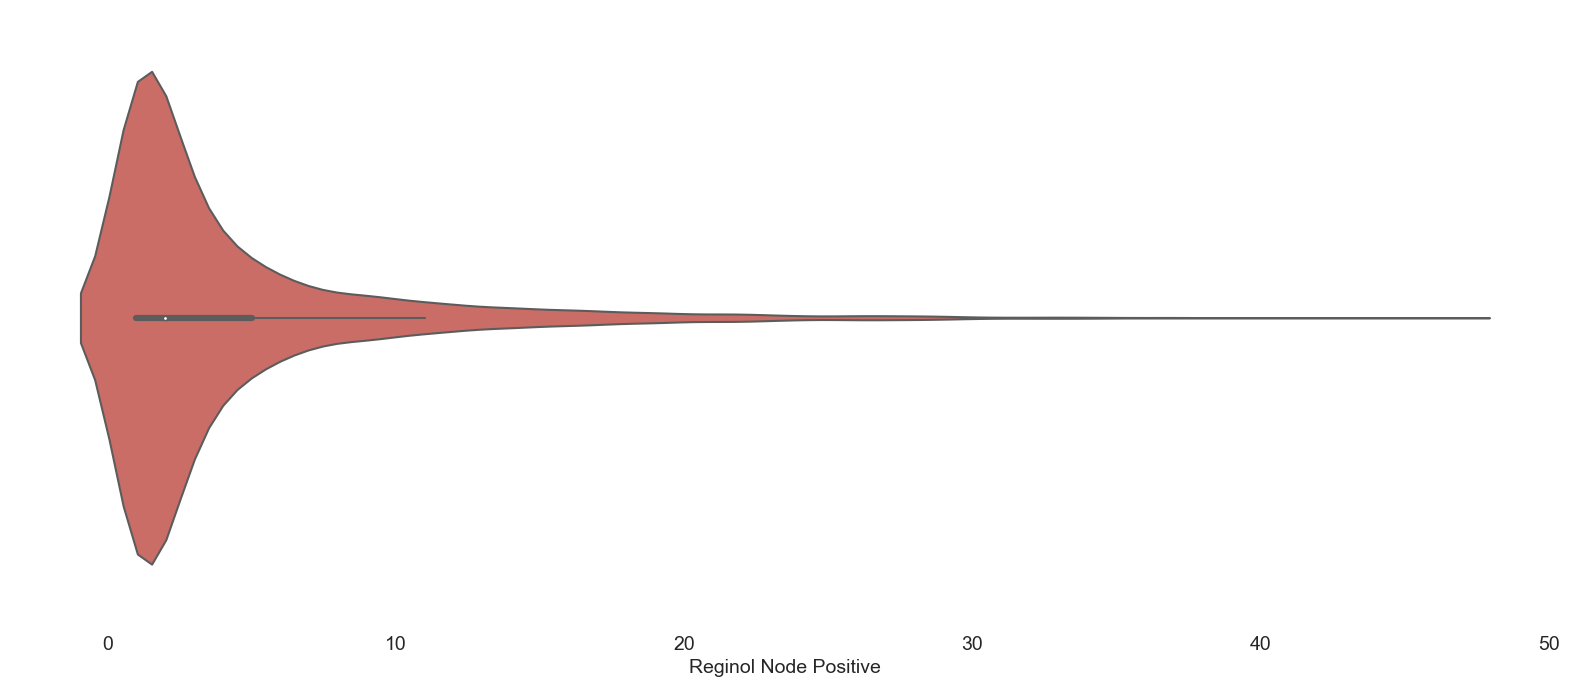

In [30]:
sns.violinplot(x=df["Reginol Node Positive"])
plt.xlabel('Reginol Node Positive')
plt.show()

## e. Numerical Attribute Survival Months

In [31]:
df['Survival Months'].describe()

count    4024.000000
mean       71.297962
std        22.921430
min         1.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: Survival Months, dtype: float64

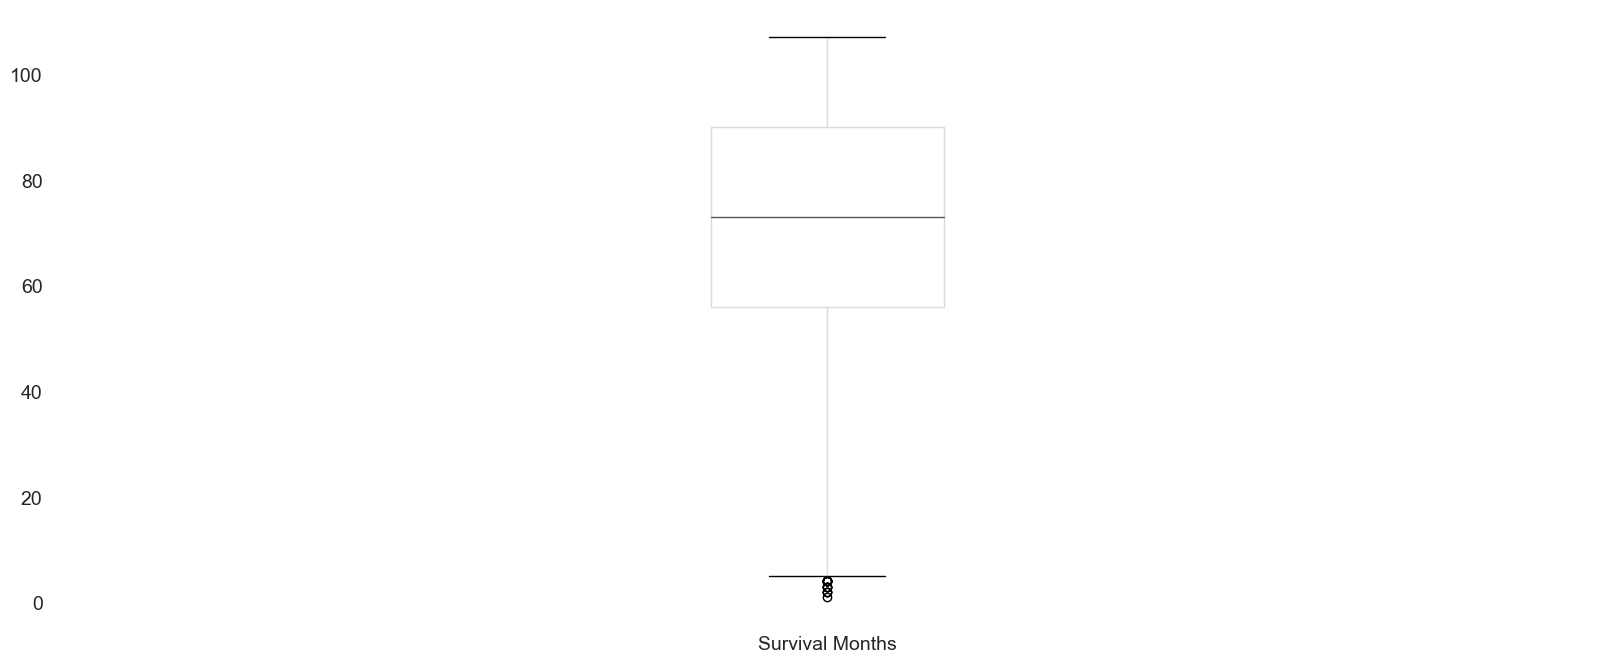

In [32]:
df.boxplot(column='Survival Months')
plt.show()

<AxesSubplot:xlabel='Survival Months', ylabel='Count'>

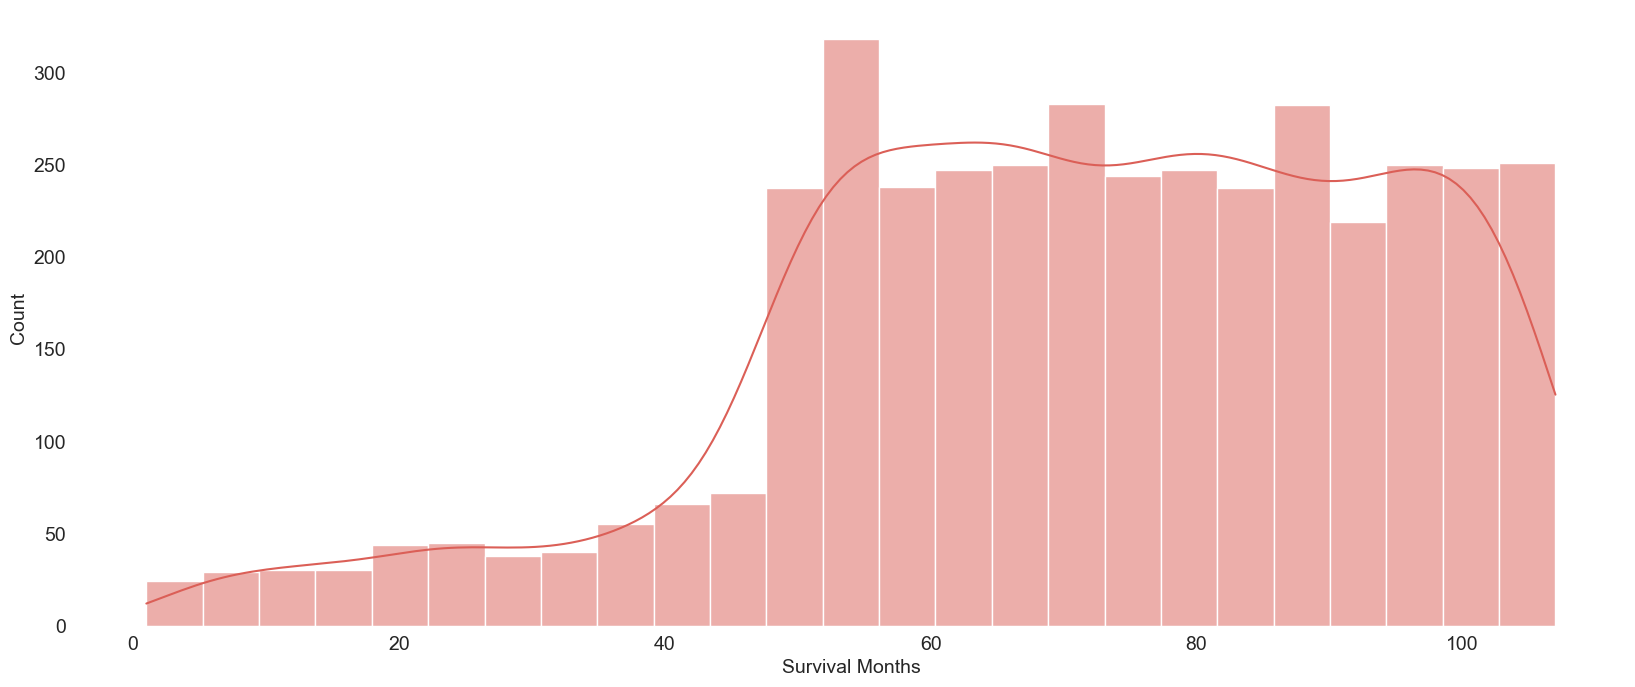

In [33]:
sns.histplot(df, x="Survival Months", kde=True)

## f. Categorical Attribute Race

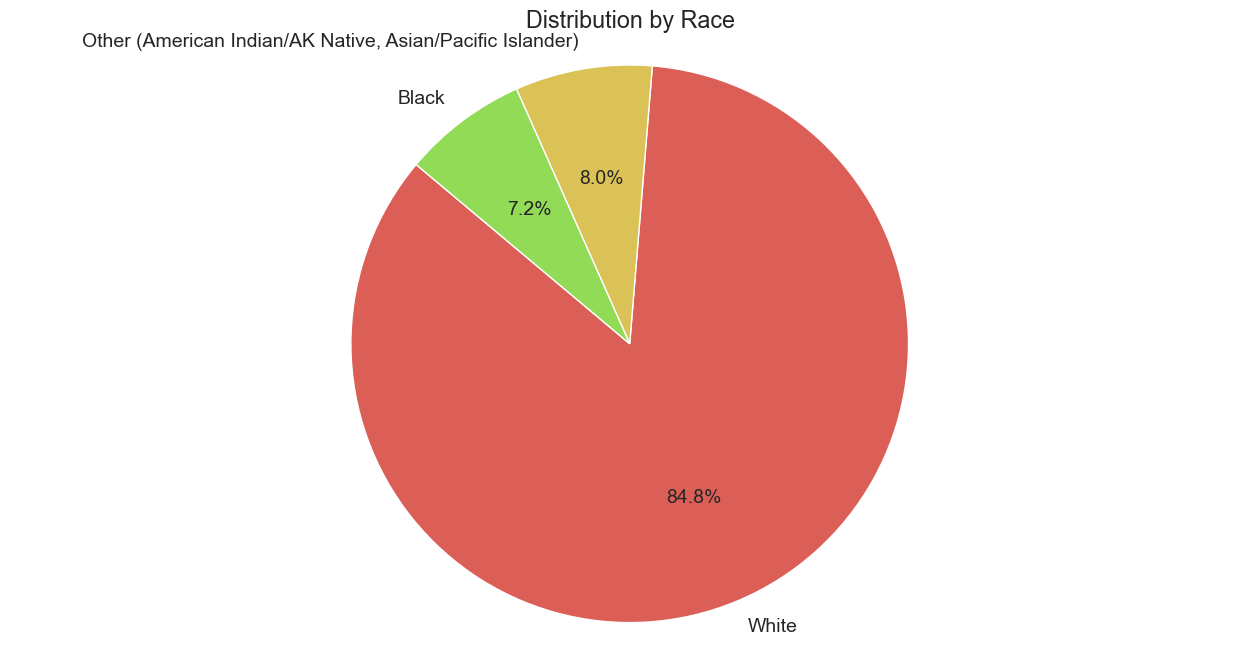

In [34]:
race_counts = df["Race "].value_counts()
plt.figure(figsize=(16,8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution by Race')
plt.show()

The majority of patients are of white race.

## g. Categorical Attribute Marital Status

In [35]:
df['Marital Status'].describe()

count                               4024
unique                                 5
top       Married (including common law)
freq                                2643
Name: Marital Status, dtype: object

There are 4024 observations in the "Marital Status" category. Within this category, there are 5 unique statuses. The most common marital status is "Married," which appears 2643 times among the patients.

In [36]:
df['Marital Status'].value_counts()

Married (including common law)    2643
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: Marital Status, dtype: int64

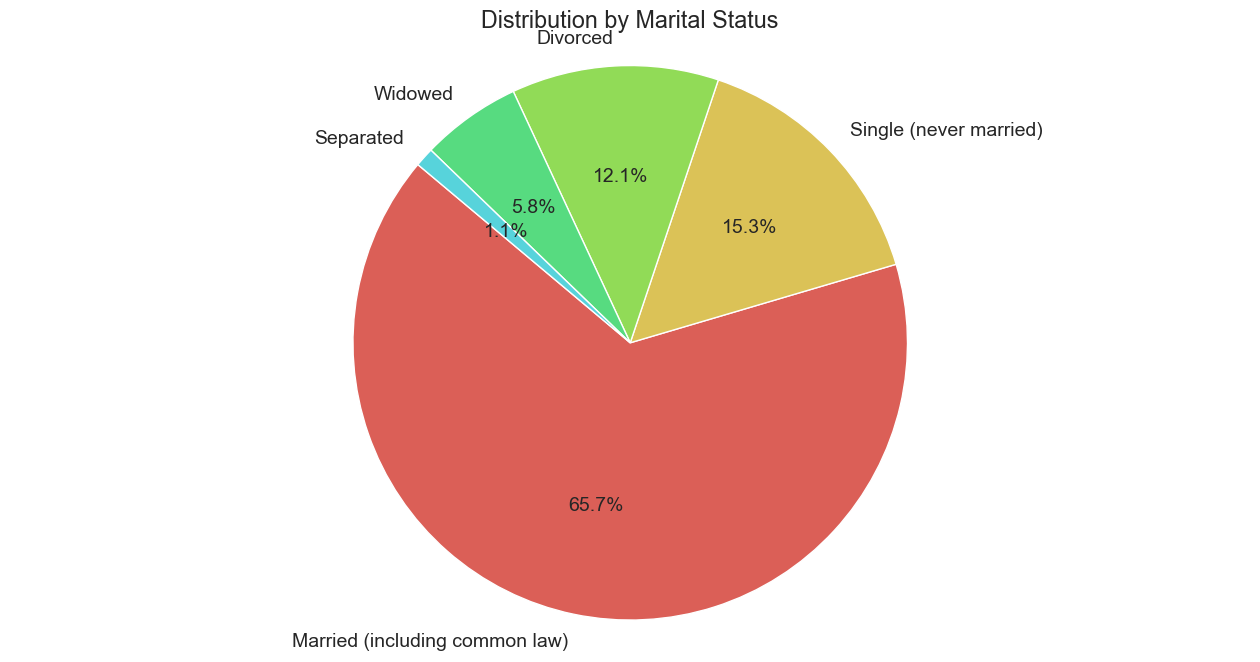

In [37]:
marital_status_counts = df["Marital Status"].value_counts()
plt.figure(figsize=(16,8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution by Marital Status')
plt.show()

## h. Categorical Attribute T Stage

In [38]:
df['T Stage '].describe()

count     4024
unique       4
top         T2
freq      1786
Name: T Stage , dtype: object

There are 4024 observations recorded for the T Stage, with 4 unique elements identified within this category. The mode, or most frequent value, is T2, appearing in the data 1786 times among the patients.

In [39]:
df['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

## i. Categorical Attribute N Stage

In [40]:
df['N Stage'].describe()

count     4024
unique       3
top         N1
freq      2732
Name: N Stage, dtype: object

4024 observations for N Stage
3 unique elements for N Stage
Mode/ most frequent value is N1 with frequence of 2732 patients.

In [41]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

## j. Categorical Attribute 6th Stage

In [42]:
df['6th Stage'].describe()

count     4024
unique       5
top        IIA
freq      1305
Name: 6th Stage, dtype: object

In [43]:
df['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

## k. Categorical Attribute Grade

In [44]:
df['Grade'].describe()

count                                    4024
unique                                      4
top       Moderately differentiated; Grade II
freq                                     2351
Name: Grade, dtype: object

In [45]:
df['Grade'].value_counts()

Moderately differentiated; Grade II       2351
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV      19
Name: Grade, dtype: int64

## l. Categorical Attribute A Stage

In [46]:
df['A Stage'].describe()

count         4024
unique           2
top       Regional
freq          3932
Name: A Stage, dtype: object

In [47]:
df['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

## m. Categorical Attribute Estrogen Status

In [48]:
df['Estrogen Status'].describe()

count         4024
unique           2
top       Positive
freq          3755
Name: Estrogen Status, dtype: object

In [49]:
df['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

## n. Categorical Attribute Progesterone Status

In [50]:
df['Progesterone Status'].describe()

count         4024
unique           2
top       Positive
freq          3326
Name: Progesterone Status, dtype: object

In [51]:
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

## Bivariate Analysis

<AxesSubplot:>

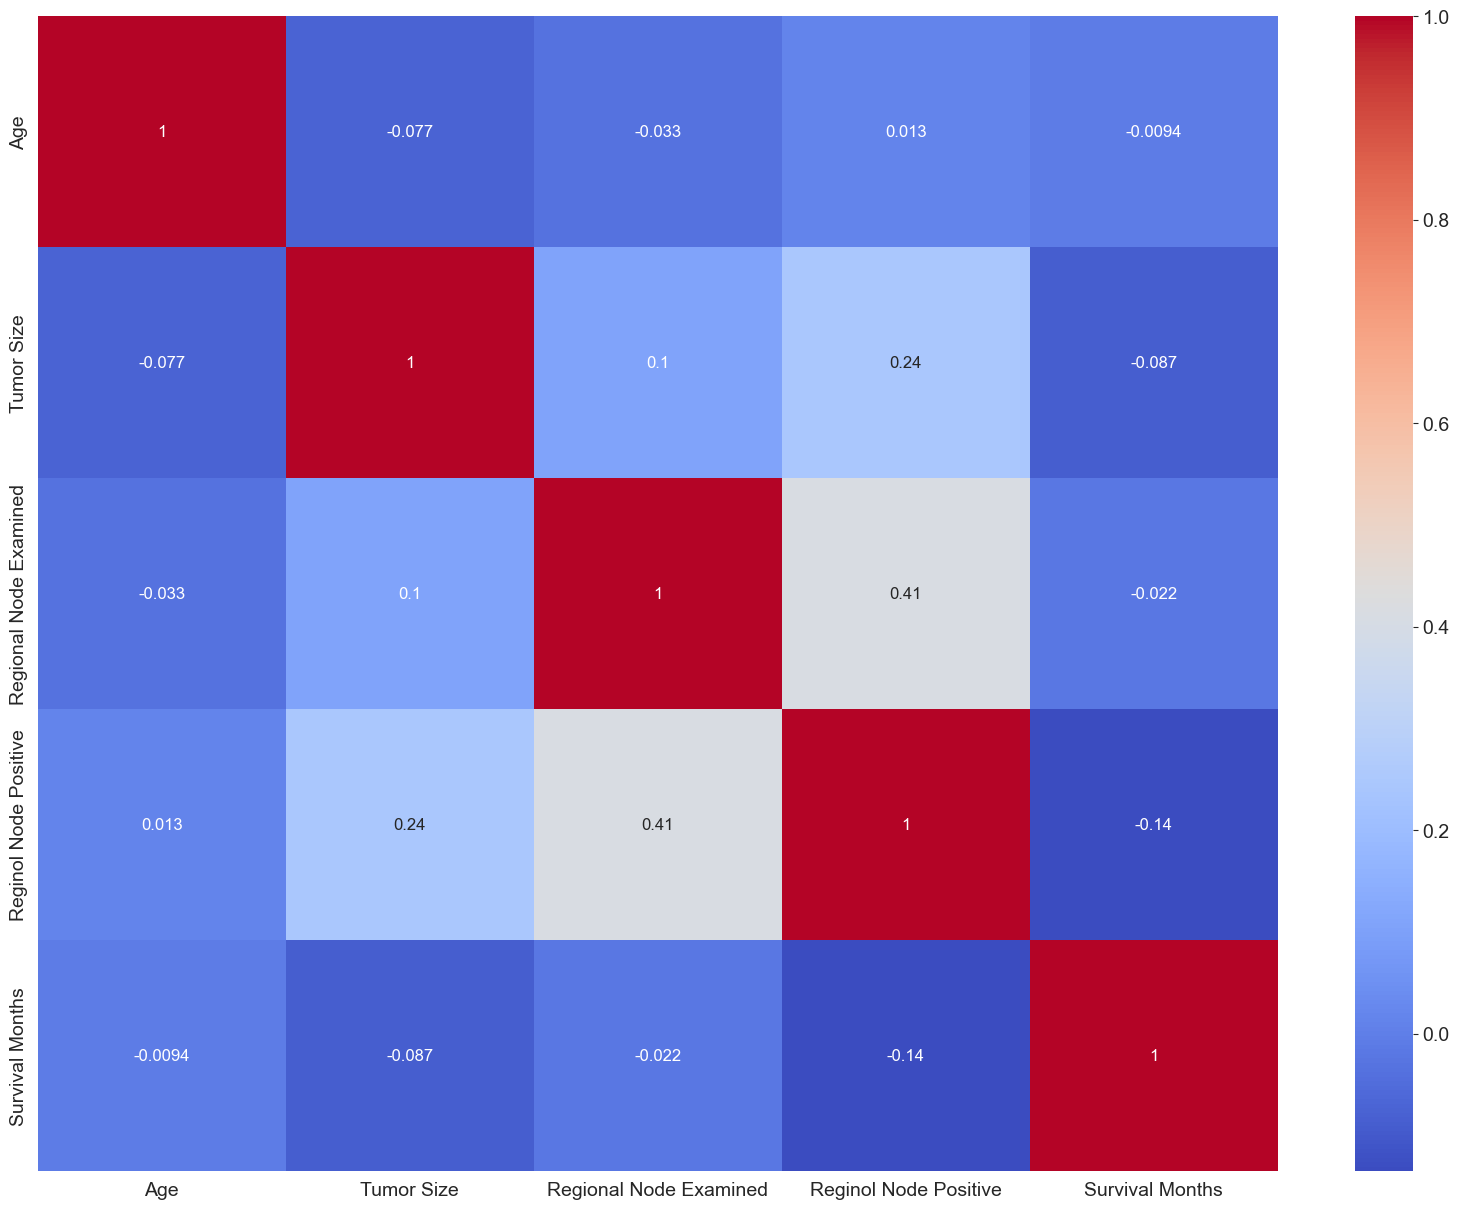

In [52]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(name='coral', colors=['white', 'coral'])

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 12})

The heat map suggests correlation greater than 0 between regional node positive and regional node examined (0.41) and tumor size and regional node positive (0.24).

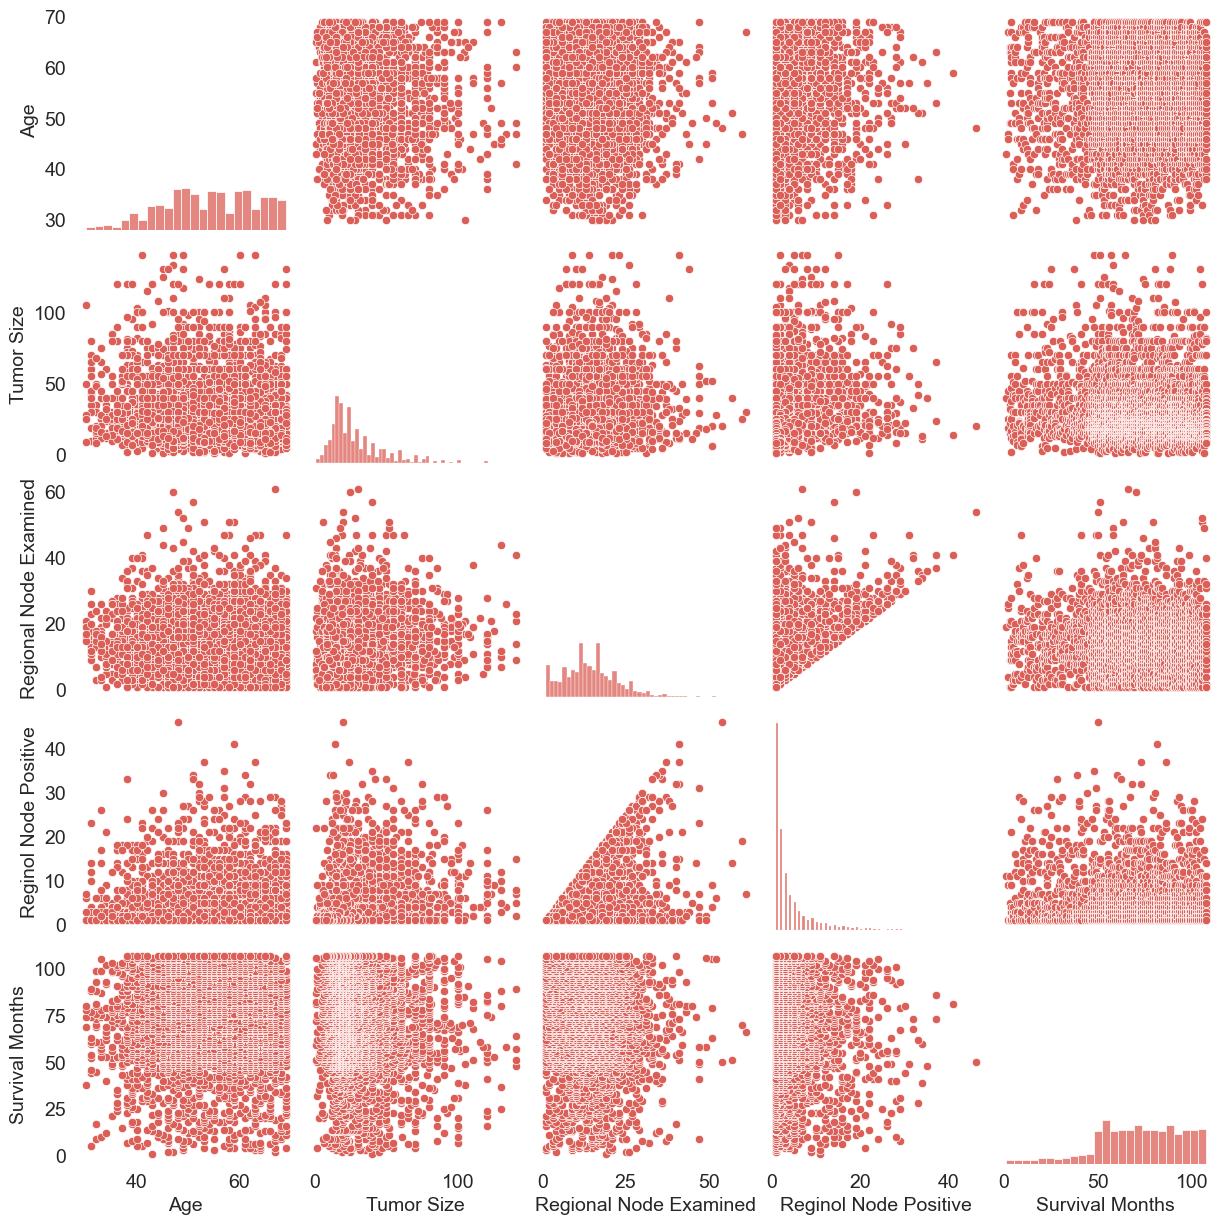

In [53]:
sns.pairplot(data=df[['Age','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']].dropna())
plt.show()

There is a linear relationship between Reginol Node Positive and Regional Node Examined.

<AxesSubplot:xlabel='Grade', ylabel='count'>

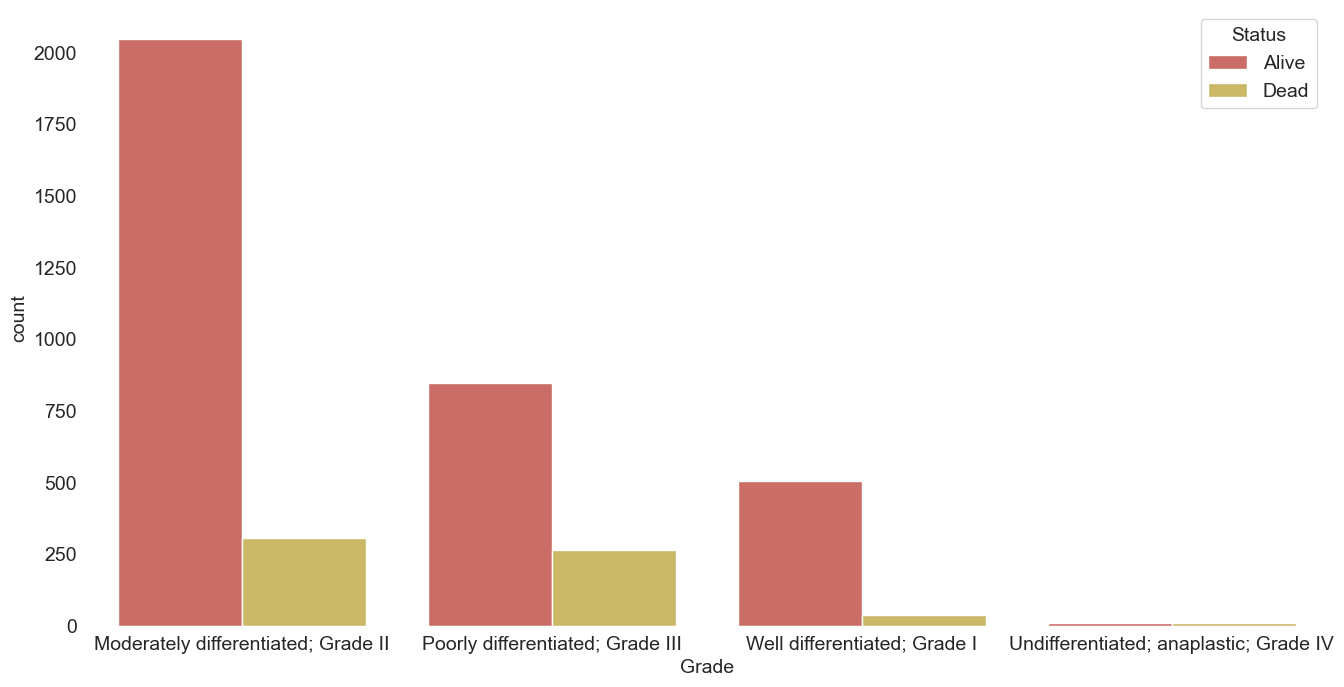

In [54]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x="Grade", hue="Status")

Most of the alive patients have moderately differentiated Tumor of Grade II. In comparison to the other categories there are only few patients with a well differentiated tumor of Grade I that are dead.

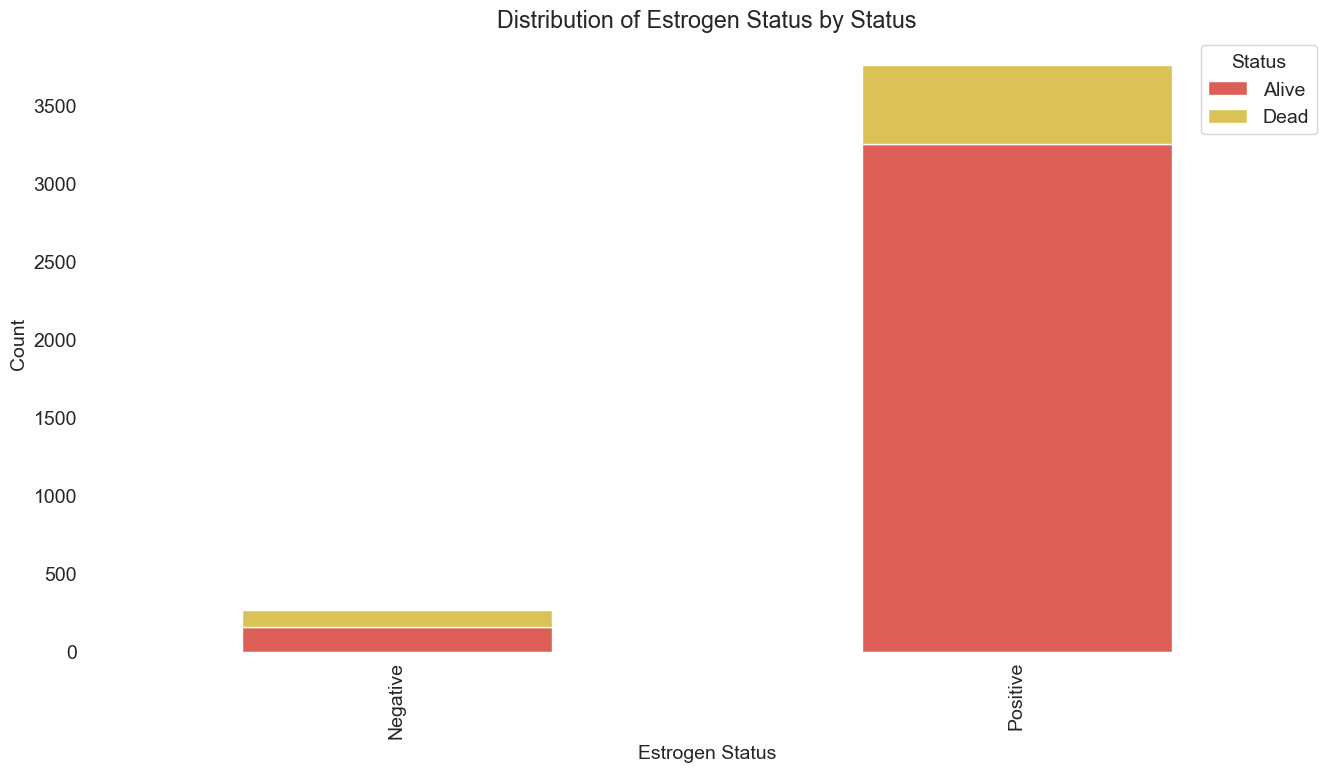

In [55]:
estrogen_status_counts = df.groupby(['Estrogen Status', 'Status']).size().unstack().fillna(0)
estrogen_status_counts.plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Distribution of Estrogen Status by Status')
plt.ylabel('Count')
plt.show()

Most of the alive patients have positive estrogen status.

Most of the alive patient have positive Progesterone Status.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


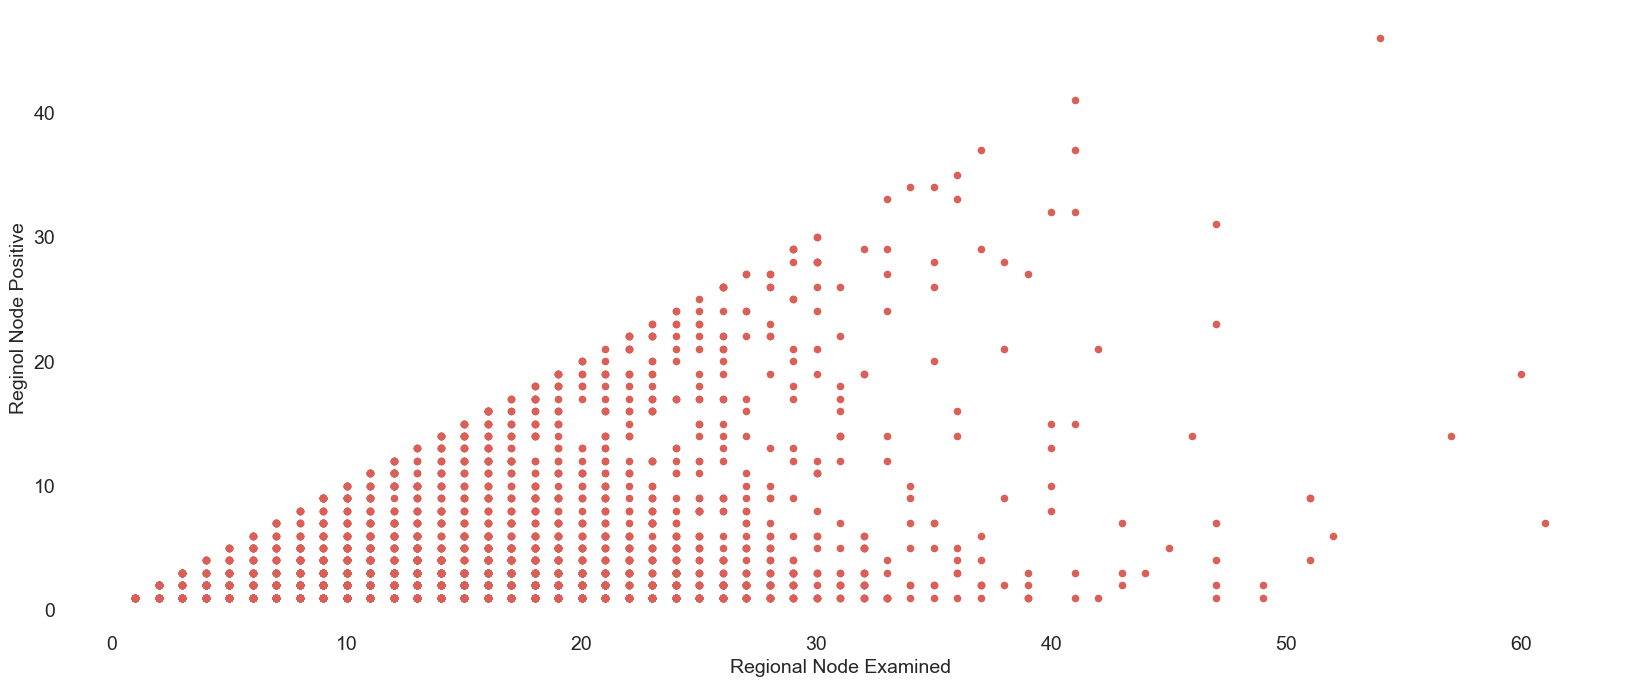

In [56]:
df.plot.scatter(x='Regional Node Examined', y='Reginol Node Positive')
plt.show()

There is a linear relationship between Regional Node Examined and Reginol Node Positive. Regional Lymph Nodes Examined are the total number of regional lymph nodes that were removed and examined by the pathologist. Reginol Node Positive are the exact number of regional nodes examined by the pathologist and found to contain metastases. It looks like that these two features have a connection.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


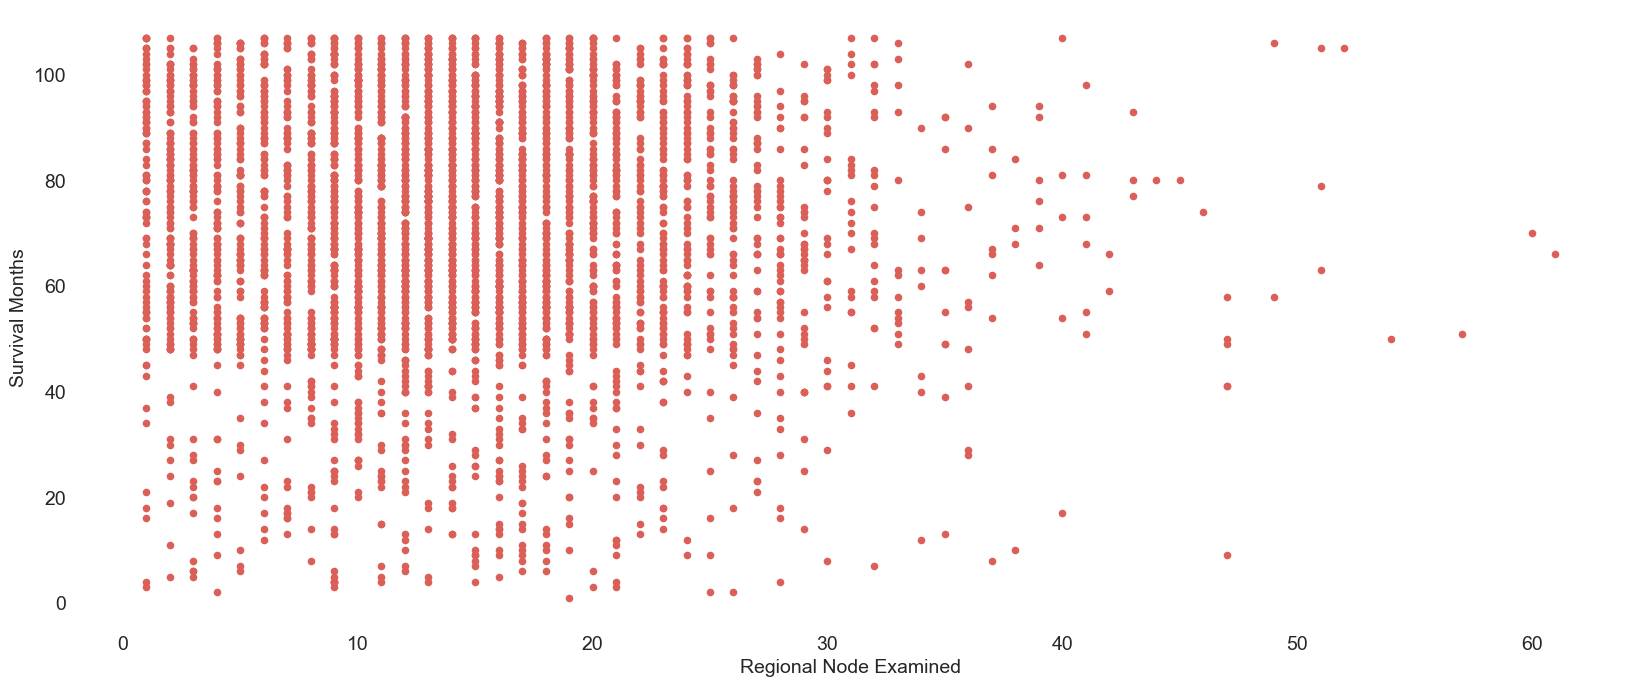

In [57]:
df.plot.scatter(x='Regional Node Examined', y='Survival Months')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


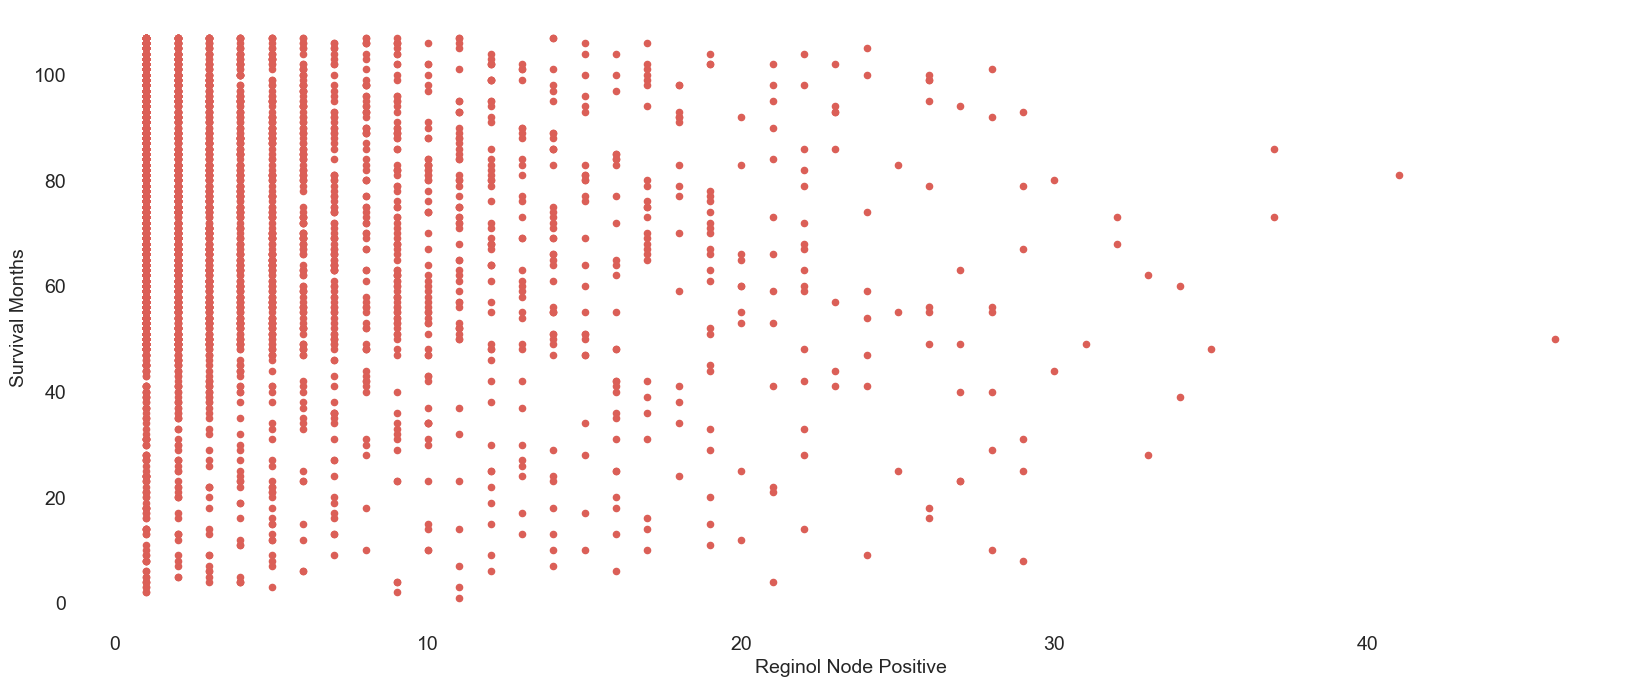

In [58]:
df.plot.scatter(x='Reginol Node Positive', y='Survival Months')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


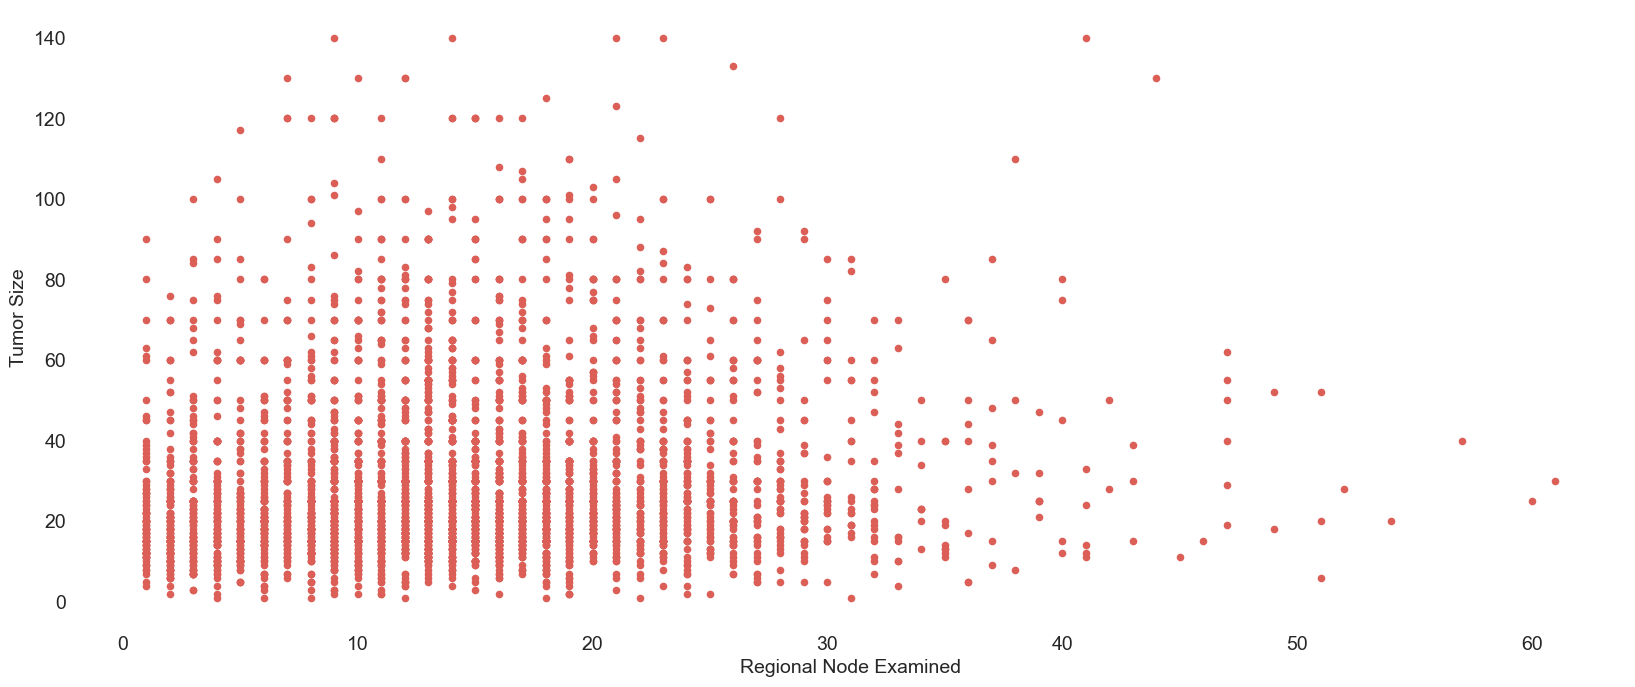

In [59]:
df.plot.scatter(x='Regional Node Examined', y='Tumor Size')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


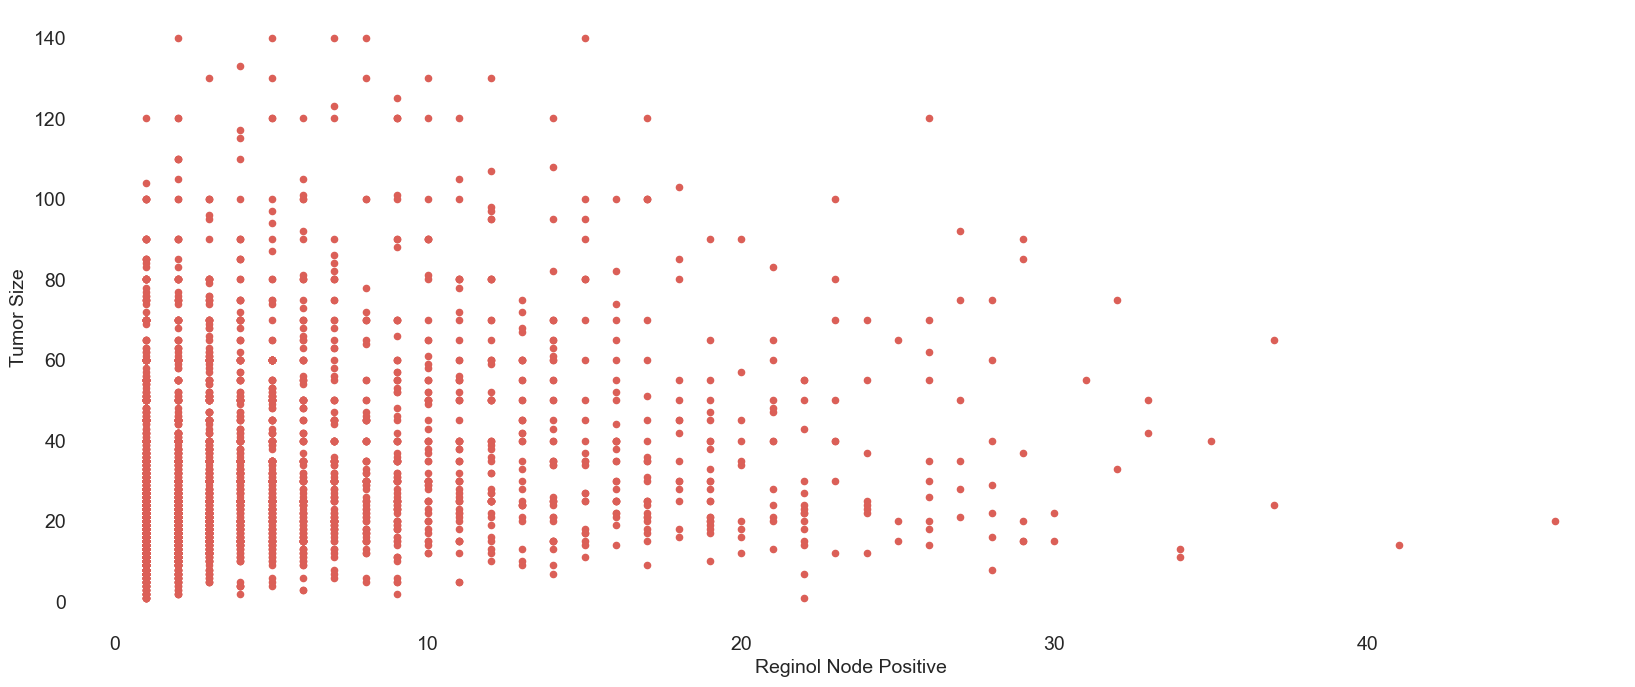

In [60]:
df.plot.scatter(x='Reginol Node Positive', y='Tumor Size')
plt.show()

## B. Data Preparation

## Encode Ordinal Categorical Attributes

First, we need to encode the tumor grade. The grade of a tumor reflects the aggressiveness of its cells; a higher grade indicates a more aggressive form. This suggests a natural hierarchy among tumor grades, classifying it as an ordinal problem. The grades have an intrinsic order, with Grade I being less than Grade II, and Grade II being less than Grade III. Therefore, we can encode these grades numerically, replacing 'Grade 1' with 1, 'Grade 2' with 2, and so on.

In [61]:
scale_mapper = {
    "Well differentiated; Grade I": 0,
    "Moderately differentiated; Grade II": 1,
    "Poorly differentiated; Grade III": 2,
    "Undifferentiated; anaplastic; Grade IV": 3
}

df['Grade'] = df['Grade'].replace(scale_mapper)

df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),T1,N1,IIA,0,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,2,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,1,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,1,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,T1,N1,IIA,1,Regional,8,Positive,Positive,1,1,107,Alive


Then we encode 6th Stage. All tumor stages are ordinal. There is an inherent order among the possible values in this column (IIA < IIB < IIIA < IIIB < IIIC. Thus, we can encode it by replacing 'IIA' by 1, 'IIB' by 2, etc.

In [62]:
scale_mapper = {
    "IIA": 0,
    "IIB": 1,
    "IIIA": 2,
    "IIIB": 3,
    "IIIC": 4
}

df['6th Stage'] = df['6th Stage'].replace(scale_mapper)

df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),T1,N1,0,0,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,2,2,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,0,1,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,0,1,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,T1,N1,0,1,Regional,8,Positive,Positive,1,1,107,Alive


In [63]:
scale_mapper = {
    "N1": 0,
    "N2": 1,
    "N3": 2
}

df['N Stage'] = df['N Stage'].replace(scale_mapper)

df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),T1,0,0,0,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,1,2,2,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,0,0,1,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,0,0,1,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,T1,0,0,1,Regional,8,Positive,Positive,1,1,107,Alive


In [64]:
scale_mapper = {
    "T1": 0,
    "T2": 1,
    "T3": 2,
    "T4": 3
}

df['T Stage '] = df['T Stage '].replace(scale_mapper)

df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),0,0,0,0,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),0,1,2,2,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,0,0,0,1,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),0,0,0,1,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,0,0,0,1,Regional,8,Positive,Positive,1,1,107,Alive


We need to transform the target variable Status to binary.

In [65]:
mapper = {'Alive': 0, 'Dead': 1}
df['Status'] = df['Status'].replace(mapper)
df['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

## One-Hot Encode All Other Categorical Attributes

In [66]:
df = pd.get_dummies(df)
df.head()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,43,1,2,4,1,40,19,11,1,0,...,1,0,0,0,0,1,0,1,0,1
1,47,1,1,2,1,45,25,9,2,0,...,1,0,0,0,0,1,0,1,0,1
2,67,1,0,1,2,25,4,1,2,1,...,1,0,0,0,0,1,0,1,0,1
3,46,0,0,0,1,19,26,1,2,1,...,0,0,0,0,0,1,0,1,0,1
4,63,1,1,2,1,35,21,5,3,1,...,1,0,0,0,0,1,0,1,0,1


## Rescaling Features

Many machine learning algorithms operate under the assumption that numerical features share a consistent scale. The scikit-learn library in Python provides two common techniques for normalization:

MinMaxScaler: Adjusts a column's values to fit within the range [0,1].
StandardScaler: Modifies a numerical column so that it possesses a mean of 0 and a standard deviation of 1.
However, for our dataset, considering the presence of outliers in columns like 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', and 'Survival Months', we'll employ a third approach named RobustScaler. This method is more resilient to outliers. It achieves normalization by subtracting the median from each value in a column and subsequently dividing by the interquartile range.

In [67]:
robust_scaler = RobustScaler()
df[['Tumor Size',
    'Regional Node Examined',
    'Reginol Node Positive',
    'Survival Months']] = robust_scaler.fit_transform(df[['Tumor Size',
                                                          'Regional Node Examined',
                                                          'Reginol Node Positive',
                                                          'Survival Months']])

In [68]:
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

## Treatmeant of Outliers

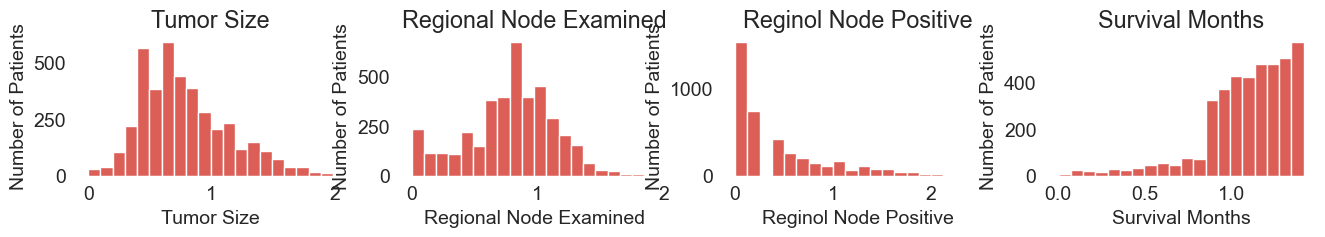

In [76]:
fig = plt.figure(figsize=(16,4))

# Plot Tumor Size
ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title("Tumor Size")
ax1.set_xlabel('Tumor Size')
ax1.set_ylabel('Number of Patients')
df['Tumor Size'].hist(bins=20)

# Plot Regional Node Examined
ax3 = fig.add_subplot(2, 4, 2)
ax3.set_title("Regional Node Examined")
ax3.set_xlabel('Regional Node Examined')
ax3.set_ylabel('Number of Patients')
df['Regional Node Examined'].hist(bins=20)

# Plot Reginol Node Positive
ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title("Reginol Node Positive")
ax3.set_xlabel('Reginol Node Positive')
ax3.set_ylabel('Number of Patients')
df['Reginol Node Positive'].hist(bins=20)

# Plot Survival Months
ax3 = fig.add_subplot(2, 4, 4)
ax3.set_title("Survival Months")
ax3.set_xlabel('Survival Months')
ax3.set_ylabel('Number of Patients')
df['Survival Months'].hist(bins=20)

plt.show()


The histograms show a leftward skew, which is suboptimal. Numerous machine learning algorithms perform optimally when the features are not skewed in either direction. Before we proceed with the treatment of the outliers, let's first identify the minimum values in these columns.

In [70]:
df[['Tumor Size', 'Regional Node Examined','Reginol Node Positive','Survival Months',]].min()

Tumor Size               -1.090909
Regional Node Examined   -1.300000
Reginol Node Positive    -0.250000
Survival Months          -2.117647
dtype: float64

Rather than disregarding the data rows containing extreme values, we can modify them to lessen the adverse effect of outliers on machine learning models. One common method to achieve this is by employing a log transformation. However, since all the columns contain negative values after rescaling, we must first add a constant to all the values, shifting them into a positive range, before applying the log transformation.
In this case, we have opted to shift the values into the interval [1, +∞], laying the groundwork for the subsequent application of a log transformation.

In [71]:
df['Tumor Size'] = np.log(df['Tumor Size']+2.09)
df['Regional Node Examined'] = np.log(df['Regional Node Examined']+2.30)
df['Reginol Node Positive'] = np.log(df['Reginol Node Positive']+1.25)
df['Survival Months'] = np.log(df['Survival Months']+3.12)

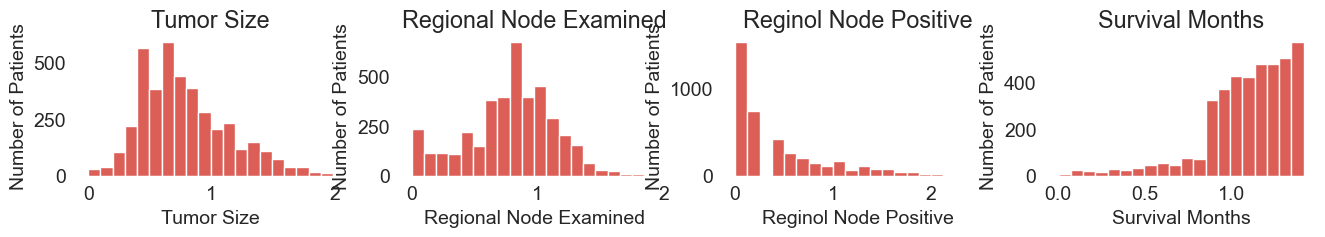

In [77]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Tumor Size
ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title("Tumor Size")
ax1.set_xlabel('Tumor Size')
ax1.set_ylabel('Number of Patients')
df['Tumor Size'].hist(bins=20)

# Plot Regional Node Examined
ax3 = fig.add_subplot(2, 4, 2)
ax3.set_title("Regional Node Examined")
ax3.set_xlabel('Regional Node Examined')
ax3.set_ylabel('Number of Patients')
df['Regional Node Examined'].hist(bins=20)

# Plot Reginol Node Positive
ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title("Reginol Node Positive")
ax3.set_xlabel('Reginol Node Positive')
ax3.set_ylabel('Number of Patients')
df['Reginol Node Positive'].hist(bins=20)

# Plot Survival Months
ax3 = fig.add_subplot(2, 4, 4)
ax3.set_title("Survival Months")
ax3.set_xlabel('Survival Months')
ax3.set_ylabel('Number of Patients')
df['Survival Months'].hist(bins=20)

plt.show()


The histograms show that the transformed features are less skewed and have distributions closer to normal than the original features.

## Save the Prepared Dataset

In [73]:
df.to_csv('Breast_Cancer_Dataset_cleaned.csv', index = False)